Download the dataset from:  https://github.com/bellawillrise/Introduction-to-Numerical-Computing-in-Python/

Submit a pdf file, which is a rendered saved version of the jupyter notebook.  Make sure to execute all the codes so the output can be viewed in the pdf. 

Also include the link to the public github repository where the jupyter notebook for the assignment is uploaded.

Link to the github repository: https://github.com/jeffrouzel/CMSC197-Machine-Learning.git

!pip install matplotlib


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [3]:
# %matplotlib inline

In [4]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [5]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

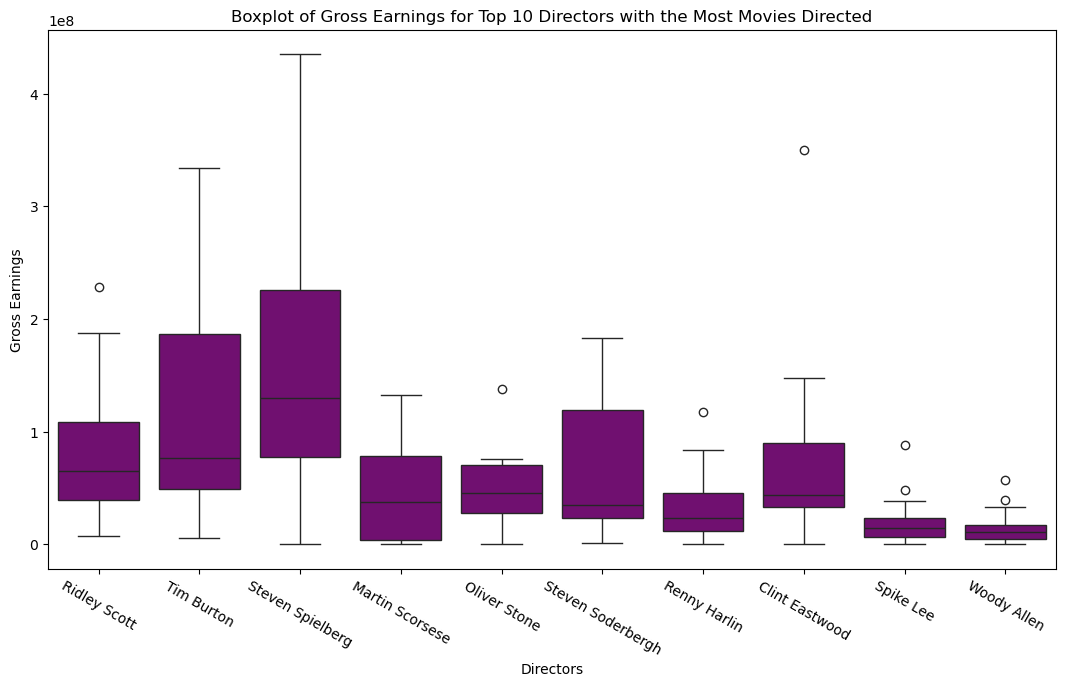

In [100]:
# Filter out directors with no name
filtered_directors = data[data['director_name'] != '0']

# Filter directors by their created movies
directors_movies = filtered_directors.groupby('director_name').size().reset_index(name='movie_count')

# Filter 10 directors with the most movie count
top_directors = directors_movies.sort_values(by='movie_count', ascending=False).head(10)
top10_directors = data[data['director_name'].isin(top_directors['director_name'])]

# Creating the Boxplot
plt.figure(figsize=(13, 7))
sns.boxplot(x='director_name', y='gross', data=top10_directors, color="purple")
plt.xticks(rotation=330)
plt.title('Boxplot of Gross Earnings for Top 10 Directors with the Most Movies Directed')
plt.xlabel('Directors')
plt.ylabel('Gross Earnings')

# Output
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

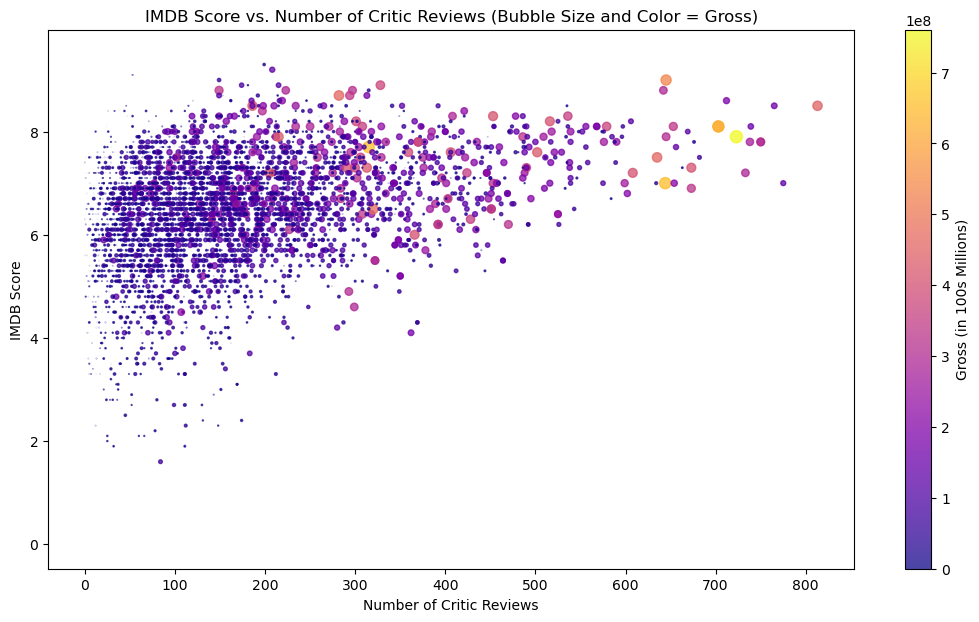

In [7]:
# Remove those with missing values from data
# n - num_critic_for_reviews, I - IMDB score, g - gross 
nIg_data = data.dropna(subset=['num_critic_for_reviews', 'imdb_score', 'gross'])

# Size of the plot
plt.figure(figsize=(13, 7))

# Create Scatter plot
# set bubble size in 1e7 to be more readable on plot, as 1e8 is too small
plt.scatter(nIg_data['num_critic_for_reviews'], nIg_data['imdb_score'], s=nIg_data['gross']/1e7, alpha=0.75, c=nIg_data['gross'], cmap='plasma')

# Labels
plt.title('IMDB Score vs. Number of Critic Reviews (Bubble Size and Color = Gross)')
plt.xlabel('Number of Critic Reviews')
plt.ylabel('IMDB Score')
plt.colorbar(label='Gross (in 100s Millions)')

# Output
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [8]:
# Create a 'sales' column and calculate it by subtracting 'budget' from 'gross'
data['sales'] = data['gross'] - data['budget']

# data table with newly create 'sales' column
data

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,English,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,English,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,English,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0


## Which directors garnered the most total sales?

In [9]:
# Sales data grouped by 'director_name' and calculated to obtain total sales.
director_totalsales = data.groupby('director_name')['sales'].sum().reset_index()

# Filter directors from highest sales to lowest, filter 10
top10_sales_directors = director_totalsales.sort_values(by='sales', ascending=False).head(10)

# Make total sales value into a more readable format
top10_sales_directors['sales'] = top10_sales_directors['sales']/1e9
top10_sales_directors['sales']= top10_sales_directors['sales'].apply(lambda x: f'{x:.4f} Billion')

# Output of top 10 sales directors
top10_sales_directors

,director_name,sales
2159,Steven Spielberg,2.4513 Billion
765,George Lucas,1.3866 Billion
923,James Cameron,1.1996 Billion
1219,Joss Whedon,1.0009 Billion
335,Chris Columbus,0.9417 Billion
1787,Peter Jackson,0.9010 Billion
2221,Tim Burton,0.8243 Billion
374,Christopher Nolan,0.8082 Billion
1158,Jon Favreau,0.7694 Billion
695,Francis Lawrence,0.7555 Billion


## Plot sales and average likes as a scatterplot. Fit it with a line.

<function matplotlib.pyplot.show(close=None, block=None)>

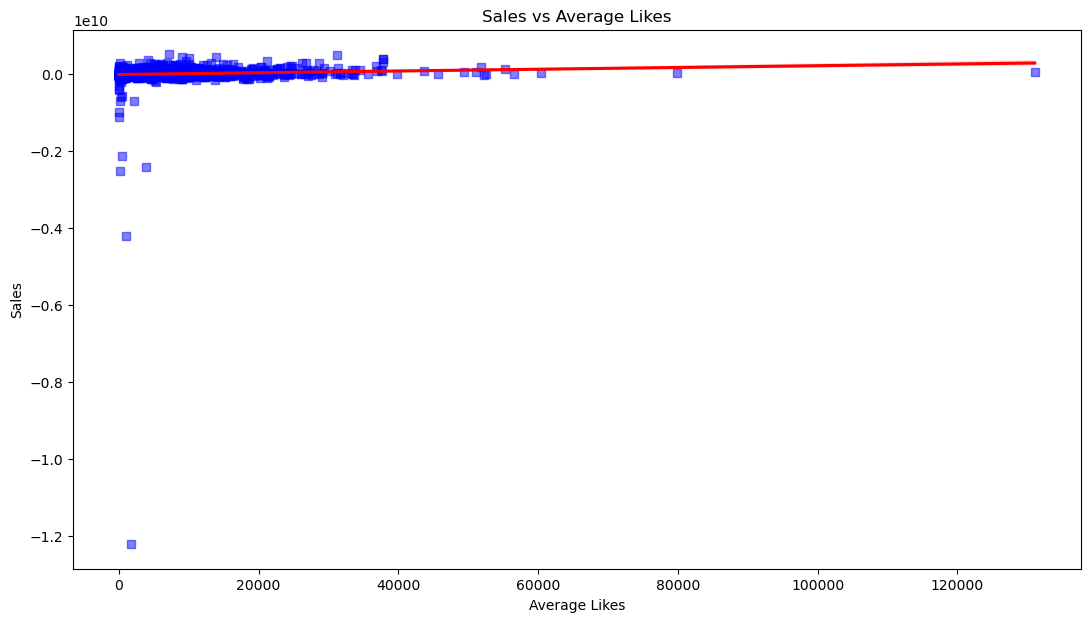

In [10]:
# Calculate the average likes
average_likes = data[['director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'movie_facebook_likes']].mean(axis=1)

# Creating a Scatterplot
plt.figure(figsize=(13,7))
sns.regplot(x=average_likes, y='sales', data=data, marker='s', scatter_kws={'color':'blue', 'alpha':0.5}, color='red')

# Labels
plt.title('Sales vs Average Likes') 
plt.xlabel('Average Likes')
plt.ylabel('Sales')

# Output
plt.show

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

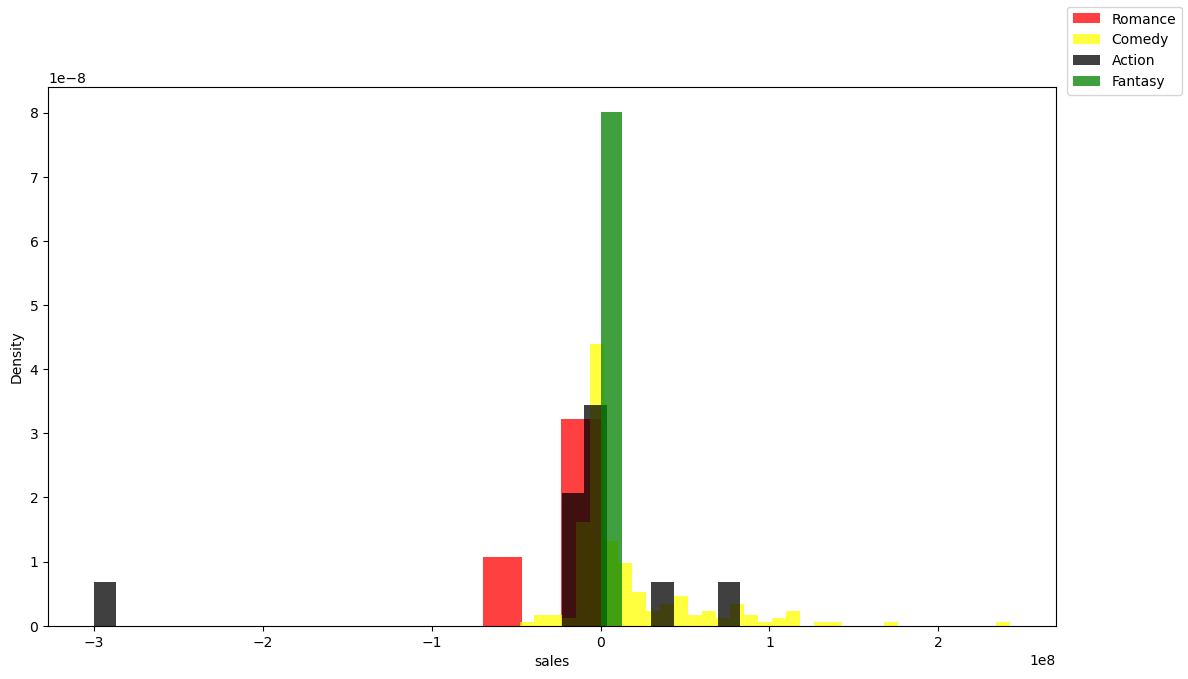

In [86]:
# Filter data for the genres
romance = data[data['genres'] == 'Romance']
comedy = data[data['genres'] == 'Comedy']
action = data[data['genres'] == 'Action']
fantasy = data[data['genres'] == 'Fantasy']

# Create the Histograms
genre_histogams = plt.figure(figsize=(13,7))

sns.histplot(romance['sales'], color='red', label='Romance', element="step",  stat='density', linewidth=0)
sns.histplot(comedy['sales'], color='yellow', label='Comedy', element="step", stat='density', linewidth=0)
sns.histplot(action['sales'], color='black', label='Action', element="step", stat='density', linewidth=0)
sns.histplot(fantasy['sales'], color='green', label='Fantasy', element="step", stat='density', linewidth=0)

# Legend for Identificaiton of the genres
genre_histogams.legend()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [89]:
# Create 'average_actor_likes' column by getting the average for the three actors' likes
data["average_actor_likes"] = data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].mean(axis=1)

# data table with newly create 'average_actor_likes' column
data

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0,584.333333
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0,0.000000
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0,718.000000
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0,41.666667


## Copying the whole dataframe

In [101]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [125]:
# Finding the columns with numeric values
numeric_col = df.select_dtypes(include=['int64', 'float64']).columns

# Variables for min and max of columns
minimum_val = df[numeric_col].min()
maximum_val = df[numeric_col].max()
# Variable for Range of values
val_range = maximum_val - minimum_val
# Normalization of the data frame
normalval_df = (df[numeric_col] - minimum_val)/ val_range

# Columns with numerical values normalized output
normalval_df


,Unnamed: 0,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0.000000,0.889299,0.941799,0.000000,0.037174,0.001563,1.000000,0.524454,0.007361,0.000000,0.603557,1.940158e-02,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.004261
1,0.000198,0.371464,0.894180,0.024478,0.043478,0.062500,0.406840,0.278867,0.073622,0.000000,0.244664,2.455896e-02,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.070229
2,0.000397,0.740467,0.783069,0.000000,0.007000,0.017188,0.263080,0.163258,0.017816,0.023256,0.196443,2.005649e-02,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.017640
3,0.000595,1.000000,0.867725,0.956522,1.000000,0.042188,0.589253,0.677217,0.162561,0.000000,0.533794,2.046580e-02,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.111450
4,0.000793,0.000000,0.000000,0.005696,0.000000,0.000205,0.000000,0.000005,0.000218,0.000000,0.000000,0.000000e+00,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,0.999207,0.052891,0.227513,0.000000,0.013870,0.001314,0.000000,0.043698,0.002669,0.023256,0.070949,0.000000e+00,0.000000,0.004328,0.789474,1.000000,0.091691,0.958898,0.002676
5040,0.999405,0.015990,0.402116,0.000000,0.000000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000593,1.146085e-07,0.998512,0.000000,0.663158,0.000000,0.000046,0.958898,0.000000
5041,0.999603,0.017220,0.529101,0.000000,0.021261,0.001478,0.000014,0.000743,0.003633,0.116279,0.001779,0.000000e+00,0.998016,0.005248,0.663158,0.146875,0.001891,0.958899,0.003289
5042,0.999802,0.052891,0.476190,0.000696,0.000696,0.000134,0.000112,0.002536,0.000248,0.000000,0.016601,9.004953e-08,0.994048,0.000168,0.694737,0.115625,0.001307,0.958905,0.000191
